In [1]:
import h5py
import numpy as np
import meshio

import matplotlib.pyplot as plt

#Set fonts
from matplotlib import rc, rcParams, cm
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})

In [ ]:
# Plotting function
def PlotLine(y = 2*56.25/25.4, x = 1.5*56.25/25.4, dpi=100):
    fig, ax = plt.subplots(figsize=(y, x), dpi=dpi, tight_layout=True)
    return ax

In [ ]:
# Read nodes and node coordinate from mesh file
meshBC = meshio.read("../cracktip_BC.inp")

In [4]:
# Fixed nodes (nodes ahead of the crack tip)
nodes_X = []   
dist_X = []   

for iNod in range(len(meshBC.points[meshBC.point_sets["Fix"]])):

	# Node id, x-coordinate
	nodes_X.append(meshBC.point_sets["Fix"][iNod])
	dist_X.append(meshBC.points[meshBC.point_sets["Fix"]][iNod,0]- 5e-6)

# To numpy array
dist_X = np.array(dist_X)
# Sorting array according to x-coordinate
sort_arr = np.argsort(dist_X)

In [ ]:
# Read the results from the output file 

fh5 = h5py.File("CrackTip_out.hdf5", "r")

stress_h = fh5["Stress_h/Step_500"][()][nodes_X]
strain_eq = fh5["Strain_eq/Step_500"][()][nodes_X]
rho = fh5["Rho/Step_500"][()][nodes_X]

fh5.close()

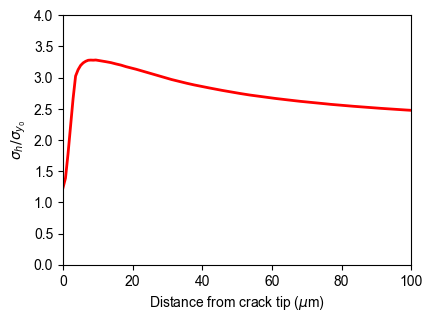

In [11]:
ax = PlotLine()

ax.plot(dist_X[sort_arr]*1e6, stress_h[sort_arr]/250e6,"r", lw=2)

ax.set_xlabel("Distance from crack tip ($\\mu$m)")
ax.set_ylabel("$\\sigma_h/\\sigma_{y_0}$")

ax.set_xlim([0, 100])
ax.set_ylim([0, 4])

plt.savefig("sig_h.svg", transparent=True)

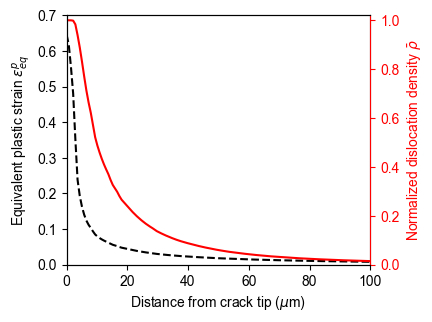

In [13]:
ax = PlotLine()

# ax.plot(data[:15000,21]/2.28e-5, data[:15000,11], "r")

ax.plot(dist_X[sort_arr]*1e6, strain_eq[sort_arr], "--k")

ax.set_xlabel("Distance from crack tip ($\\mu$m)")
ax.set_ylabel("Equivalent plastic strain $\\varepsilon^{p}_{eq}$")

ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.plot(dist_X[sort_arr]*1e6, rho[sort_arr],"r")
ax2.set_ylabel("Normalized dislocation density $\\bar{\\rho}$")

ax.set_xlim([0, 100])
ax.set_ylim([0, 0.7])
ax2.set_ylim([0, 1.02])
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.label.set_color('red')

plt.savefig("strain_eq.svg", transparent=True)